# Libraries

In [347]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
#from matplotlib import style

# Read Data

In [1167]:
total_case_df = pd.read_excel("Case_Data.xlsx","Total Cases")
air_df = pd.read_csv("AQI_Data_31Jan2021.csv")
air_df.Date = pd.to_datetime(air_df.Date,dayfirst=True)

# Data Mining

In [1461]:
total_case_df[total_case_df["District"].str.contains("Lucknow")==1]

,State,District,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,...,2020-11-10 00:00:00,2020-11-11 00:00:00,2020-11-12 00:00:00,2020-11-13 00:00:00,2020-11-14 00:00:00,2020-11-15 00:00:00,2020-11-16 00:00:00,2020-11-17 00:00:00,2020-11-18 00:00:00,2020-11-19 00:00:00
680,Uttar Pradesh,Lucknow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65631.0,65929.0,66244.0,66544.0,66930.0,67085.0,67332.0,67534.0,67829.0,68145.0


In [1185]:
#air_df_copy=air_df.copy(deep=True)
air_df=air_df_copy.copy(deep=True)

In [1168]:
air_df.sort_values(by="Date",inplace=True)

In [1169]:
air_df["City"].value_counts()

Delhi         6992
Mumbai        3864
Chennai       1472
Kolkata       1288
Pune          1288
Hyderabad     1104
Lucknow        736
Ahmedabad      184
Chandigarh     184
Name: City, dtype: int64

In [1316]:
def data_mining (cases_city,aqi_city):
    print(cases_city)
    print(aqi_city)
    case_df = total_case_df[total_case_df['District']==cases_city].transpose()
    case_df.drop(index=['State','District'],inplace=True)
    print(case_df.shape)
   # case_df.rename(columns={case_df.columns[0]: "Total Cases"},inplace=True)
    if len(case_df.columns)==1:
        case_df.columns=["Total Cases"]
    elif len(case_df.columns)==2:
        case_df.columns=["Total Cases","1"]
        case_df.drop(columns="1",inplace=True)
    case_df['Date'] = case_df.index
    first_index_value=case_df.first_valid_index()
    if case_df.loc[first_index_value,"Total Cases"]==np.nan:
        prev_value=0
    else:
        prev_value=case_df.loc[first_index_value,"Total Cases"]
        prev_date=case_df.loc[first_index_value,"Date"]
        daily_cases=0
    for i,row in case_df.iterrows():
        if(str(row["Total Cases"])!="nan"):
            if prev_date!=row["Date"]:
                daily_cases=row["Total Cases"]-prev_value
                #print(str(row["Total Cases"])+"..."+str(daily_cases))
                case_df.at[i,"Total_Day_Cases"]=daily_cases
                prev_value=row["Total Cases"]
                prev_date=row["Date"]
            else:
                case_df.at[i,"Total_Day_Cases"]=daily_cases
    case_df.reset_index(drop=True, inplace=True)
    case_df = (air_df[air_df.City == aqi_city]).join(case_df.set_index('Date'),on='Date')
    #print("Before...")
    #print(case_df)
    

    #case_df.drop(columns = ['Unnamed: 0','State','Station_Name','NH3_average','NH3_minimum','NH3_maximum'],inplace=True)
    #case_df.dropna(axis=0,inplace=True)
    #case_df.dropna()
    #case_df['Total Cases'] = case_df['Total Cases'].astype(int)
    return(case_df)

In [1317]:
air_df.Date=air_df.Date-pd.to_timedelta(2,unit="d")

In [1787]:
li=[]
aqi_city=["Delhi","Chennai","Bangalore","Kolkata","Hyderabad","Mumbai","Pune","Lucknow","Chandigarh","Ahmedabad"]
for i,city in enumerate(["Delhi","Chennai","Bengaluru Urban","Kolkata","Hyderabad","Mumbai City","Pune","Lucknow","Chandigarh","Ahmedabad"]):
    city_df=data_mining(city,aqi_city[i])
    li.append(city_df)
major_cities_df=pd.concat(li,ignore_index=False,axis=0)

Delhi
Delhi
(295, 1)


In [1935]:
li=[]
aqi_city=["Delhi","Chennai","Kolkata","Hyderabad","Mumbai"]
#aqi_city=["Delhi"]
for i,city in enumerate(["Delhi","Chennai","Kolkata","Hyderabad","Mumbai City"]):
#for i,city in enumerate(["Delhi"]):
    city_df=data_mining(city,aqi_city[i])
    li.append(city_df)
major_cities_df=pd.concat(li,ignore_index=False,axis=0)

Delhi
Delhi
(295, 1)
Chennai
Chennai
(295, 1)
Kolkata
Kolkata
(295, 1)
Hyderabad
Hyderabad
(295, 1)
Mumbai City
Mumbai
(295, 1)


In [1936]:
major_cities_df["Total_Day_Cases"].sort_values()

13016   -819.0
1608    -819.0
7128    -819.0
12464   -819.0
12096   -819.0
         ...  
11040      NaN
12880      NaN
11960      NaN
6992       NaN
16744      NaN
Name: Total_Day_Cases, Length: 14720, dtype: float64

In [1937]:
major_cities_df.drop(columns = ['Unnamed: 0','State','Station_Name','NH3_average','NH3_minimum','NH3_maximum'],inplace=True)
pollutant_cols=list(major_cities_df.drop(columns=["City","Station_ID","Date","Total Cases","Total_Day_Cases"]).columns)
major_cities_df.dropna(subset=pollutant_cols,how="all",axis=0,inplace=True)
major_cities_df.dropna(subset=["Total Cases"],how="all",axis=0,inplace=True)
major_cities_df

,City,Station_ID,Date,PM2.5_average,PM2.5_minimum,PM2.5_maximum,PM10_average,PM10_minimum,PM10_maximum,NO2_average,...,SO2_minimum,SO2_maximum,CO_average,CO_minimum,CO_maximum,OZONE_average,OZONE_minimum,OZONE_maximum,Total Cases,Total_Day_Cases
17111,Delhi,site_106,2020-06-29,58.0,19.0,84.0,89.0,48.0,122.0,24.0,...,NaN,NaN,31.0,23.0,39.0,82.0,27.0,151.0,87360,2199.0
8463,Delhi,site_1435,2020-06-29,81.0,57.0,98.0,106.0,70.0,171.0,22.0,...,24.0,54.0,91.0,85.0,101.0,53.0,5.0,94.0,87360,2199.0
11959,Delhi,site_105,2020-06-29,70.0,44.0,93.0,86.0,48.0,120.0,11.0,...,NaN,NaN,33.0,30.0,35.0,55.0,32.0,68.0,87360,2199.0
7911,Delhi,site_124,2020-06-29,38.0,10.0,63.0,74.0,44.0,109.0,23.0,...,8.0,26.0,45.0,30.0,52.0,12.0,5.0,17.0,87360,2199.0
5151,Delhi,site_1427,2020-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,73.0,2.0,117.0,55.0,32.0,76.0,87360,2199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,Mumbai,site_5112,2020-11-19,103.0,67.0,158.0,93.0,60.0,111.0,32.0,...,2.0,7.0,44.0,35.0,63.0,89.0,14.0,135.0,272455,924.0
7400,Mumbai,site_5104,2020-11-19,174.0,85.0,386.0,169.0,103.0,278.0,97.0,...,6.0,18.0,50.0,24.0,76.0,48.0,6.0,100.0,272455,924.0
11632,Mumbai,site_5120,2020-11-19,75.0,46.0,122.0,77.0,50.0,107.0,75.0,...,20.0,58.0,55.0,43.0,95.0,7.0,6.0,8.0,272455,924.0
16048,Mumbai,site_5102,2020-11-19,99.0,66.0,191.0,NaN,NaN,NaN,29.0,...,NaN,NaN,32.0,19.0,43.0,NaN,NaN,NaN,272455,924.0


In [1938]:
final_df=major_cities_df.groupby(by=["City","Date"]).count().reset_index()[["City","Date"]]

In [1939]:
final_df["Unique"]=final_df["City"]+"|"+final_df["Date"].astype('str')
major_cities_df["Unique"]=major_cities_df["City"]+"|"+major_cities_df["Date"].astype('str')

In [1940]:
major_cities_df.columns

Index(['City', 'Station_ID', 'Date', 'PM2.5_average', 'PM2.5_minimum',
       'PM2.5_maximum', 'PM10_average', 'PM10_minimum', 'PM10_maximum',
       'NO2_average', 'NO2_minimum', 'NO2_maximum', 'SO2_average',
       'SO2_minimum', 'SO2_maximum', 'CO_average', 'CO_minimum', 'CO_maximum',
       'OZONE_average', 'OZONE_minimum', 'OZONE_maximum', 'Total Cases',
       'Total_Day_Cases', 'Unique'],
      dtype='object')

In [1941]:
final_df

,City,Date,Unique
0,Chennai,2020-06-29,Chennai|2020-06-29
1,Chennai,2020-06-30,Chennai|2020-06-30
2,Chennai,2020-07-01,Chennai|2020-07-01
3,Chennai,2020-07-02,Chennai|2020-07-02
4,Chennai,2020-07-03,Chennai|2020-07-03
...,...,...,...
715,Mumbai,2020-11-15,Mumbai|2020-11-15
716,Mumbai,2020-11-16,Mumbai|2020-11-16
717,Mumbai,2020-11-17,Mumbai|2020-11-17
718,Mumbai,2020-11-18,Mumbai|2020-11-18


In [1942]:
cols_with_na=major_cities_df.groupby(by=["Unique"]).max().columns[major_cities_df.groupby(by=["Unique"]).max().isna().any()]
cols_with_na

Index(['PM10_average', 'PM10_minimum', 'PM10_maximum'], dtype='object')

In [1943]:
major_cities_df.drop(columns=cols_with_na,inplace=True)

In [1944]:
for col in major_cities_df.select_dtypes(include=[np.number]).columns:
    groupby_citydate=major_cities_df.groupby(by=["Unique"])
    if(col.find('maximum')!=-1):
        group_df=pd.DataFrame(groupby_citydate.max()[col])
        final_df=final_df.join(group_df,on="Unique")
    elif(col.find('minimum')!=-1):
        group_df=pd.DataFrame(groupby_citydate.min()[col])
        final_df=final_df.join(group_df,on="Unique")
    else:
        group_df=pd.DataFrame(groupby_citydate.mean()[col])
        final_df=final_df.join(group_df,on="Unique")
    #else:
        #group_df=pd.DataFrame(groupby_citydate.mean()[col])
        #final_df=final_df.join(group_df,on="Unique")

In [1945]:
final_df["Date"].sort_values()

0     2020-06-29
576   2020-06-29
144   2020-06-29
432   2020-06-29
288   2020-06-29
         ...    
575   2020-11-19
287   2020-11-19
143   2020-11-19
431   2020-11-19
719   2020-11-19
Name: Date, Length: 720, dtype: datetime64[ns]

In [1972]:
final_df

,City,Date,Unique,PM2.5_average,PM2.5_minimum,PM2.5_maximum,NO2_average,NO2_minimum,NO2_maximum,SO2_average,SO2_minimum,SO2_maximum,CO_average,CO_minimum,CO_maximum,OZONE_average,OZONE_minimum,OZONE_maximum,Total_Day_Cases
0,Chennai,2020-06-29,Chennai|2020-06-29,24.000000,3.0,97.0,12.000000,1.0,101.0,10.333333,1.0,101.0,30.666667,5.0,58.0,52.666667,17.0,252.0,2207.0
1,Chennai,2020-06-30,Chennai|2020-06-30,25.500000,5.0,71.0,15.000000,2.0,55.0,13.000000,1.0,63.0,32.000000,6.0,61.0,44.500000,18.0,121.0,2358.0
2,Chennai,2020-07-01,Chennai|2020-07-01,30.000000,4.0,66.0,23.500000,8.0,65.0,7.500000,1.0,67.0,36.500000,2.0,62.0,62.000000,5.0,145.0,2206.0
3,Chennai,2020-07-02,Chennai|2020-07-02,22.000000,8.0,59.0,12.000000,8.0,15.0,25.000000,3.0,90.0,38.500000,28.0,101.0,36.500000,3.0,72.0,2065.0
4,Chennai,2020-07-03,Chennai|2020-07-03,16.666667,1.0,82.0,12.333333,1.0,53.0,7.333333,1.0,58.0,35.000000,10.0,58.0,65.000000,2.0,260.0,2091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Mumbai,2020-11-15,Mumbai|2020-11-15,139.000000,28.0,484.0,31.500000,1.0,135.0,11.000000,1.0,33.0,60.437500,1.0,127.0,37.133333,2.0,246.0,577.0
716,Mumbai,2020-11-16,Mumbai|2020-11-16,139.916667,33.0,433.0,41.333333,1.0,157.0,12.153846,1.0,47.0,59.375000,1.0,119.0,40.866667,3.0,146.0,409.0
717,Mumbai,2020-11-17,Mumbai|2020-11-17,138.357143,41.0,459.0,41.125000,1.0,157.0,12.071429,1.0,48.0,58.187500,17.0,113.0,41.800000,3.0,222.0,541.0
718,Mumbai,2020-11-18,Mumbai|2020-11-18,138.400000,52.0,379.0,43.062500,1.0,133.0,11.357143,1.0,50.0,58.687500,13.0,113.0,41.800000,3.0,216.0,871.0


In [1946]:
cols_with_na=final_df.groupby(by=["Unique"]).max().columns[final_df.groupby(by=["Unique"]).max().isna().any()]
cols_with_na

Index([], dtype='object')

In [1947]:
#sns.pairplot(data = city_df)

In [1948]:
corr_df=pd.DataFrame(final_df.corr())
corr_df

,PM2.5_average,PM2.5_minimum,PM2.5_maximum,NO2_average,NO2_minimum,NO2_maximum,SO2_average,SO2_minimum,SO2_maximum,CO_average,CO_minimum,CO_maximum,OZONE_average,OZONE_minimum,OZONE_maximum,Total_Day_Cases
PM2.5_average,1.000000,0.710142,0.753183,0.863517,0.331769,0.690871,0.472753,-0.013270,0.455844,0.804246,0.047890,0.629907,0.370858,-0.131573,0.659099,0.669215
PM2.5_minimum,0.710142,1.000000,0.429995,0.658680,0.403302,0.424606,0.330669,0.153983,0.260585,0.442487,0.185022,0.278923,0.295028,0.021599,0.347099,0.266061
PM2.5_maximum,0.753183,0.429995,1.000000,0.655100,0.157978,0.649077,0.326291,-0.129203,0.456095,0.748367,0.017947,0.683202,0.452697,-0.207623,0.721682,0.560290
NO2_average,0.863517,0.658680,0.655100,1.000000,0.439185,0.789064,0.360890,-0.032409,0.435539,0.682940,0.008338,0.546471,0.270628,-0.154000,0.586514,0.473738
NO2_minimum,0.331769,0.403302,0.157978,0.439185,1.000000,0.164076,-0.021999,0.177818,0.029013,0.194422,0.153999,0.060879,0.270491,0.138165,0.123949,0.026345
NO2_maximum,0.690871,0.424606,0.649077,0.789064,0.164076,1.000000,0.367541,-0.101775,0.472511,0.681528,-0.043802,0.621732,0.232073,-0.227207,0.654492,0.555128
SO2_average,0.472753,0.330669,0.326291,0.360890,-0.021999,0.367541,1.000000,0.286812,0.644587,0.339634,-0.077160,0.303621,-0.064160,-0.209767,0.308306,0.476039
SO2_minimum,-0.013270,0.153983,-0.129203,-0.032409,0.177818,-0.101775,0.286812,1.000000,-0.036529,-0.105289,0.140868,-0.162872,-0.061141,0.110554,-0.132743,-0.143474
SO2_maximum,0.455844,0.260585,0.456095,0.435539,0.029013,0.472511,0.644587,-0.036529,1.000000,0.475530,-0.076494,0.468297,0.155519,-0.163816,0.463314,0.448578
CO_average,0.804246,0.442487,0.748367,0.682940,0.194422,0.681528,0.339634,-0.105289,0.475530,1.000000,0.111629,0.852149,0.402706,-0.148653,0.746583,0.699713


In [1949]:
#high_corr_cols=list(corr_df[(corr_df["Total_Day_Cases"]>0.2) | (corr_df["Total_Day_Cases"]<=-0.2)].index)
#final_high_df=final_df[high_corr_cols]

In [1950]:
high_corr_cols

['PM2.5_average',
 'PM2.5_minimum',
 'PM2.5_maximum',
 'NO2_average',
 'NO2_maximum',
 'SO2_average',
 'SO2_minimum',
 'SO2_maximum',
 'CO_average',
 'CO_minimum',
 'CO_maximum',
 'OZONE_minimum',
 'OZONE_maximum',
 'Total_Day_Cases']

In [1951]:
final_df.columns

Index(['City', 'Date', 'Unique', 'PM2.5_average', 'PM2.5_minimum',
       'PM2.5_maximum', 'NO2_average', 'NO2_minimum', 'NO2_maximum',
       'SO2_average', 'SO2_minimum', 'SO2_maximum', 'CO_average', 'CO_minimum',
       'CO_maximum', 'OZONE_average', 'OZONE_minimum', 'OZONE_maximum',
       'Total_Day_Cases'],
      dtype='object')

In [1952]:
final_high_df=final_df[high_corr_cols]
#high_corr_cols

# Train Test Split

In [1953]:
#x = city_high_df.drop(columns = ['City','Station_ID','Date','Unique','Total Cases'])
x=final_high_df.drop(columns = ['Total_Day_Cases'])
y = final_high_df['Total_Day_Cases']

In [1954]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [1955]:
x.shape

(720, 13)

# Linear Regression

In [1830]:
x_train

,PM2.5_average,PM2.5_minimum,PM2.5_maximum,NO2_average,NO2_maximum,SO2_average,SO2_minimum,SO2_maximum,CO_average,CO_minimum,CO_maximum,OZONE_minimum,OZONE_maximum
442,18.250000,7.0,44.0,8.200000,21.0,13.166667,4.0,52.0,16.666667,6.0,24.0,16.0,124.0
437,18.000000,5.0,57.0,10.000000,32.0,12.500000,1.0,26.0,18.142857,8.0,36.0,7.0,49.0
504,29.500000,4.0,97.0,15.500000,77.0,7.666667,2.0,14.0,18.666667,8.0,37.0,1.0,94.0
295,20.750000,7.0,43.0,13.250000,38.0,6.500000,3.0,11.0,13.250000,2.0,29.0,5.0,30.0
111,61.000000,21.0,160.0,14.000000,22.0,5.333333,2.0,12.0,47.500000,4.0,135.0,1.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,48.000000,10.0,98.0,33.750000,84.0,5.250000,1.0,14.0,15.500000,5.0,35.0,2.0,72.0
320,43.200000,10.0,141.0,32.600000,85.0,7.200000,2.0,18.0,33.000000,1.0,104.0,1.0,193.0
527,28.142857,10.0,83.0,12.000000,57.0,7.428571,3.0,14.0,40.500000,9.0,98.0,3.0,57.0
125,79.000000,31.0,288.0,14.500000,27.0,14.500000,3.0,44.0,33.750000,4.0,88.0,1.0,119.0


In [1831]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
model_lr.coef_

array([  12.19341855,   -8.082441  ,   -1.21877528,  -27.65592133,
          4.95119058,    8.70942745, -120.71769488,   -0.41507815,
         26.90269483,   -0.97861717,   -2.37196309,   10.65220848,
          4.26386187])

In [1832]:
y_pred = model_lr.predict(x_test)
result_lr = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result_lr.head(5)

,Actual,Predicted
425,0.0,-138.917943
277,5023.0,6619.541846
47,1184.0,991.007532
459,648.0,1126.154449
335,0.0,128.287435


In [1873]:
y_pred_all=model_lr.predict(x)
result_all_df = pd.DataFrame({'Actual':y,'Predicted':y_pred_all})
final_high_df["Total_Cases_Predicted"]=result_all_df["Predicted"]
final_high_df[(final_high_df["Total_Day_Cases"]-final_high_df["Total_Cases_Predicted"])>500].shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(54, 15)

###### Delhi, Chennai, Kolkata, Hyderabad, Mumbai 2-day offset

Mean Absolute Error: 485.29165888181586
Mean Squared Error: 537321.3140582081
Root Mean Squared Error: 733.0220420002445


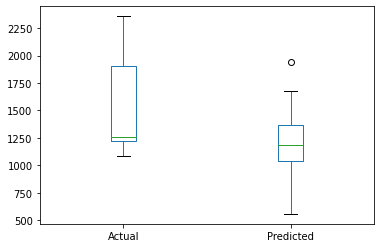

In [1836]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_all))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_all)))
#result_lr.head(20).plot(kind = 'bar')
result_all_df.head(20).plot(kind = 'box')

###### Chandigarh 2-day offset

Mean Absolute Error: 26.63378490376189
Mean Squared Error: 1369.8298111046845
Root Mean Squared Error: 37.01121196481797


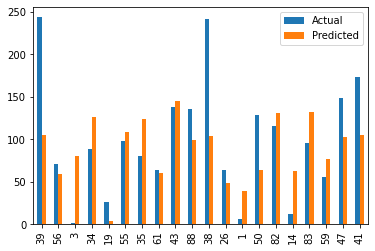

In [1512]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_all))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_all)))
result_lr.head(20).plot(kind = 'bar')

###### Lucknow 2-day offset

Mean Absolute Error: 282.0889198034277
Mean Squared Error: 360094.0498966971
Root Mean Squared Error: 600.0783697957269


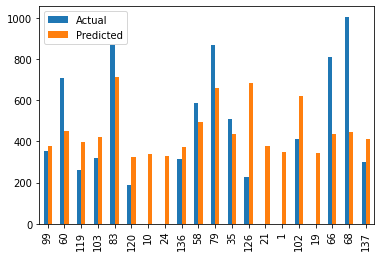

In [1415]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_all))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_all)))
result_lr.head(20).plot(kind = 'bar')

###### Pune 2-day offset

Mean Absolute Error: 748.2183250934667
Mean Squared Error: 940133.6161839128
Root Mean Squared Error: 969.6048763202012


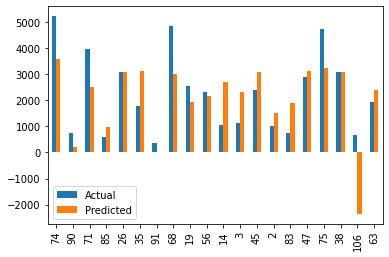

In [1391]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_all))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_all)))
result_lr.head(20).plot(kind = 'bar')

###### Mumbai 2-day offset

Mean Absolute Error: 373.11482167311084
Mean Squared Error: 231169.43490920556
Root Mean Squared Error: 480.8008266519574


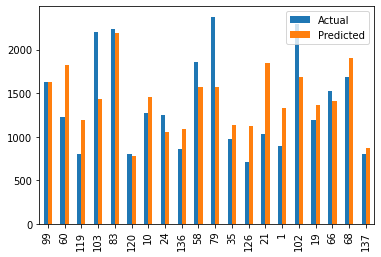

In [1367]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_all))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_all)))
result_lr.head(20).plot(kind = 'bar')

###### Kolkata 2-day offset

Mean Absolute Error: 1086.4768734143202
Mean Squared Error: 2028000.4843274427
Root Mean Squared Error: 1424.0788195628227


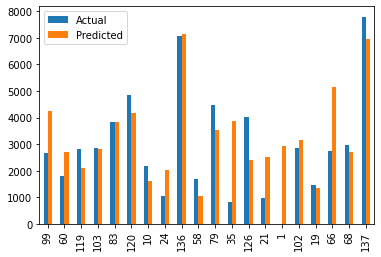

In [1265]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
result_lr.head(20).plot(kind = 'bar')

###### Chennai 2-day offset

Mean Absolute Error: 1343.8197100166274
Mean Squared Error: 2952405.94143432
Root Mean Squared Error: 1718.2566576138502


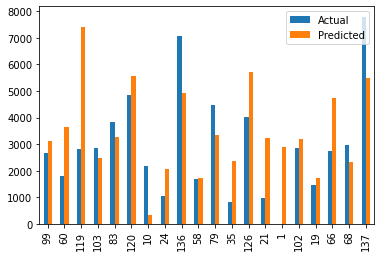

In [1238]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
result_lr.head(20).plot(kind = 'bar')

###### Delhi 2-day offset

Mean Absolute Error: 937.2089024316168
Mean Squared Error: 1483879.3979382347
Root Mean Squared Error: 1218.1458853266445


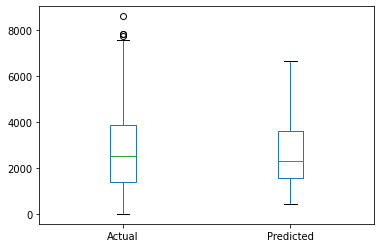

In [1876]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_all))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_all)))
#result_lr.head(20).plot(kind = 'bar')
result_all_df.plot(kind = 'box')

# Logistic Regression

In [1956]:
model_log = LogisticRegression()
model_log.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1957]:
y_pred = model_log.predict(x_test)
result_log = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result_log.head(5)

,Actual,Predicted
580,1375.0,1200.0
444,412.0,709.0
683,2211.0,894.0
223,4473.0,773.0
489,541.0,0.0


In [1958]:
y_pred_all=model_log.predict(x)
result_all_df = pd.DataFrame({'Actual':y,'Predicted':y_pred_all})

In [1959]:
result_all_df.shape

(720, 2)

In [1960]:
result_all_df[np.abs(result_all_df['Predicted']-result_all_df['Actual'])>1000].shape

(43, 2)

###### Delhi, Chennai, Kolkata, Hyderabad, Mumbai 2-day offset

In [1961]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y,y_pred_all))
print('Mean Squared Error:', metrics.mean_squared_error(y,y_pred_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,y_pred_all)))

Mean Absolute Error: 209.25694444444446
Mean Squared Error: 379417.7013888889
Root Mean Squared Error: 615.9689126805742


In [1962]:
final_high_df["Total_Cases_Prediction"]=y_pred_all
final_high_df["Difference in Prediction"]=np.abs(final_high_df["Total_Day_Cases"]-final_high_df["Total_Cases_Prediction"])
final_high_df[final_high_df["Difference in Prediction"]<500].shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(628, 16)

In [1963]:
final_high_df["City"]=final_df["City"]
final_high_df["Date"]=final_df["Date"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1964]:
final_high_df

,PM2.5_average,PM2.5_minimum,PM2.5_maximum,NO2_average,NO2_maximum,SO2_average,SO2_minimum,SO2_maximum,CO_average,CO_minimum,CO_maximum,OZONE_minimum,OZONE_maximum,Total_Day_Cases,Total_Cases_Prediction,Difference in Prediction,City,Date
0,24.000000,3.0,97.0,12.000000,101.0,10.333333,1.0,101.0,30.666667,5.0,58.0,17.0,252.0,2207.0,2207.0,0.0,Chennai,2020-06-29
1,25.500000,5.0,71.0,15.000000,55.0,13.000000,1.0,63.0,32.000000,6.0,61.0,18.0,121.0,2358.0,2358.0,0.0,Chennai,2020-06-30
2,30.000000,4.0,66.0,23.500000,65.0,7.500000,1.0,67.0,36.500000,2.0,62.0,5.0,145.0,2206.0,2206.0,0.0,Chennai,2020-07-01
3,22.000000,8.0,59.0,12.000000,15.0,25.000000,3.0,90.0,38.500000,28.0,101.0,3.0,72.0,2065.0,2065.0,0.0,Chennai,2020-07-02
4,16.666667,1.0,82.0,12.333333,53.0,7.333333,1.0,58.0,35.000000,10.0,58.0,2.0,260.0,2091.0,2091.0,0.0,Chennai,2020-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,139.000000,28.0,484.0,31.500000,135.0,11.000000,1.0,33.0,60.437500,1.0,127.0,2.0,246.0,577.0,801.0,224.0,Mumbai,2020-11-15
716,139.916667,33.0,433.0,41.333333,157.0,12.153846,1.0,47.0,59.375000,1.0,119.0,3.0,146.0,409.0,409.0,0.0,Mumbai,2020-11-16
717,138.357143,41.0,459.0,41.125000,157.0,12.071429,1.0,48.0,58.187500,17.0,113.0,3.0,222.0,541.0,541.0,0.0,Mumbai,2020-11-17
718,138.400000,52.0,379.0,43.062500,133.0,11.357143,1.0,50.0,58.687500,13.0,113.0,3.0,216.0,871.0,541.0,330.0,Mumbai,2020-11-18


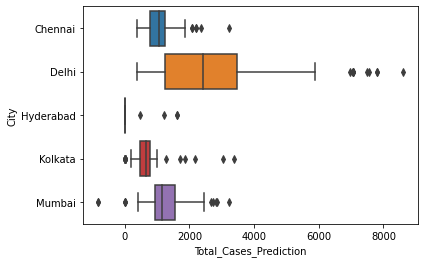

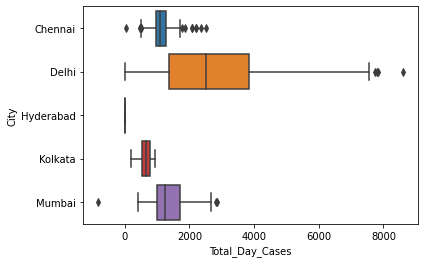

In [1971]:
sns.boxplot(y="City",x="Total_Cases_Prediction",data=final_high_df,orient="h")
plt.show()
sns.boxplot(y="City",x="Total_Day_Cases",data=final_high_df,orient="h")

###### Mumbai 2-day offset

Mean Absolute Error: 2378.7291666666665
Mean Squared Error: 9525713.479166666
Root Mean Squared Error: 3086.3754598503833


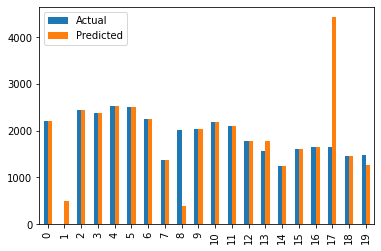

In [1753]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y,y_pred_all))
print('Mean Squared Error:', metrics.mean_squared_error(y,y_pred_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,y_pred_all)))
result_all_df.head(20).plot(kind = 'bar')

In [1754]:
final_high_df["Total_Cases_Prediction"]=y_pred_all
final_high_df["Difference in Prediction"]=np.abs(final_high_df["Total_Day_Cases"]-final_high_df["Total_Cases_Prediction"])
final_high_df[final_high_df["Difference in Prediction"]<500].shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(43, 7)

###### Kolkata 2-day offset

Mean Absolute Error: 2378.7291666666665
Mean Squared Error: 9525713.479166666
Root Mean Squared Error: 3086.3754598503833


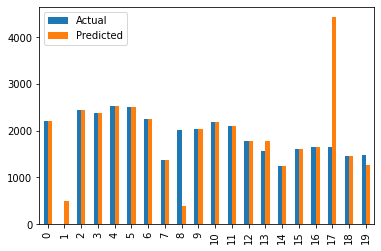

In [1733]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y,y_pred_all))
print('Mean Squared Error:', metrics.mean_squared_error(y,y_pred_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,y_pred_all)))
result_all_df.head(20).plot(kind = 'bar')

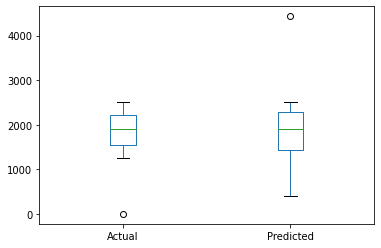

In [1755]:
result_all_df.head(20).plot(kind = 'box')

In [1734]:
final_high_df["Total_Cases_Prediction"]=y_pred_all
final_high_df["Difference in Prediction"]=np.abs(final_high_df["Total_Day_Cases"]-final_high_df["Total_Cases_Prediction"])
final_high_df[final_high_df["Difference in Prediction"]<500].shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(24, 19)

###### Chennai 2-day offset

Mean Absolute Error: 2063.3263888888887
Mean Squared Error: 8887297.479166666
Root Mean Squared Error: 2981.157070529271


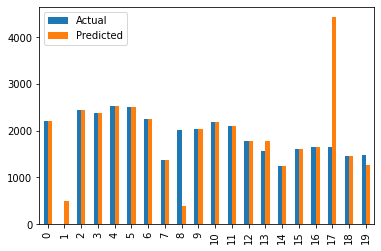

In [1705]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y,y_pred_all))
print('Mean Squared Error:', metrics.mean_squared_error(y,y_pred_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,y_pred_all)))
result_all_df.head(20).plot(kind = 'bar')

In [1711]:
final_high_df["Total_Cases_Prediction"]=y_pred_all
final_high_df["Difference in Prediction"]=np.abs(final_high_df["Total_Day_Cases"]-final_high_df["Total_Cases_Prediction"])
final_high_df[final_high_df["Difference in Prediction"]<500].shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(43, 14)

###### Delhi 2-day offset

Mean Absolute Error: 493.03472222222223
Mean Squared Error: 1109566.173611111
Root Mean Squared Error: 1053.3594702717164


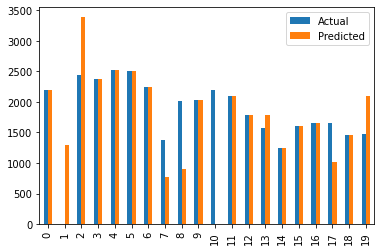

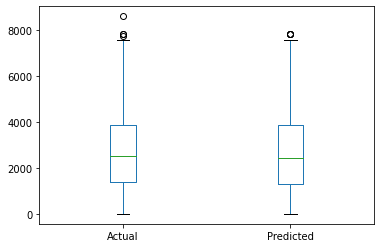

In [1883]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y,y_pred_all))
print('Mean Squared Error:', metrics.mean_squared_error(y,y_pred_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,y_pred_all)))
result_all_df.head(20).plot(kind = 'bar')
result_all_df.plot(kind = 'box')

In [1881]:
final_high_df["Total_Cases_Prediction"]=y_pred_all
final_high_df["Difference in Prediction"]=np.abs(final_high_df["Total_Day_Cases"]-final_high_df["Total_Cases_Prediction"])
final_high_df[final_high_df["Difference in Prediction"]<500]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PM2.5_average,PM2.5_minimum,PM2.5_maximum,NO2_average,NO2_maximum,SO2_average,SO2_minimum,SO2_maximum,CO_average,CO_minimum,CO_maximum,OZONE_minimum,OZONE_maximum,Total_Day_Cases,Total_Cases_Predicted,Total_Cases_Prediction,Difference in Prediction
0,69.700000,10.0,335.0,21.105263,71.0,13.125000,1.0,54.0,45.033333,2.0,122.0,2.0,264.0,2199.0,1925.441392,2199.0,0.0
3,122.615385,4.0,453.0,29.962963,144.0,13.391304,1.0,79.0,52.758621,1.0,168.0,1.0,271.0,2373.0,2702.645643,2373.0,0.0
4,76.176471,3.0,446.0,21.750000,289.0,11.000000,1.0,36.0,40.727273,2.0,118.0,1.0,224.0,2520.0,2688.633902,2520.0,0.0
5,52.346154,1.0,411.0,22.076923,81.0,11.083333,1.0,60.0,42.321429,1.0,104.0,3.0,257.0,2505.0,1647.842851,2505.0,0.0
6,80.464286,1.0,434.0,26.178571,159.0,14.454545,1.0,107.0,50.281250,1.0,162.0,1.0,169.0,2244.0,1925.320351,2244.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,451.515152,82.0,500.0,88.687500,250.0,23.933333,1.0,118.0,115.057143,5.0,181.0,1.0,270.0,7802.0,6638.701618,7802.0,0.0
139,177.310345,8.0,500.0,41.142857,132.0,14.916667,1.0,120.0,68.366667,7.0,125.0,1.0,280.0,3235.0,3462.010215,3235.0,0.0
141,253.896552,67.0,462.0,59.444444,183.0,13.521739,1.0,60.0,80.400000,8.0,138.0,1.0,278.0,6396.0,4007.813696,6396.0,0.0
142,278.529412,42.0,500.0,72.676471,225.0,15.964286,1.0,85.0,75.714286,6.0,147.0,1.0,262.0,7486.0,4103.151826,7486.0,0.0
